# Wine dataset 
1. Decision tree 
2. pruning
3. finding top features
4. baggin boosting
5. Random forest


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("/content/wine.csv")
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
'''
Alcohol: alcohol content, units of ABV (alcohol by volume).
Malic acid: organic acids found in wine
Ash: ash after evaporation and incineration.
Alcalinity of ash: how much base in ash .
Magnesium: affects flavor
Total phenols: affect the taste, color, and mouthfeel (texture) of wine.
Flavoids: type of phenol.

Nonflavoid phenols:type of phenol.

Proanthocyanins: type of phenol.

Color intensity: color intensity

Hue: hue of wine

OD: protein content measurements.

Proline: amino acid
'''

'\nAlcohol: alcohol content, units of ABV (alcohol by volume).\nMalic acid: organic acids found in wine\nAsh: ash after evaporation and incineration.\nAlcalinity of ash: how much base in ash .\nMagnesium: affects flavor\nTotal phenols: affect the taste, color, and mouthfeel (texture) of wine.\nFlavoids: type of phenol.\n\nNonflavoid phenols:type of phenol.\n\nProanthocyanins: type of phenol.\n\nColor intensity: color intensity\n\nHue: hue of wine\n\nOD: protein content measurements.\n\nProline: amino acid\n'

In [ ]:
print(df.apply(lambda col: col.unique())) #unique values
print(df.apply(lambda col: col.nunique())) #count of unique values

Wine                                                            [1, 2, 3]
Alcohol                 [14.23, 13.2, 13.16, 14.37, 13.24, 14.2, 14.39...
Malic.acid              [1.71, 1.78, 2.36, 1.95, 2.59, 1.76, 1.87, 2.1...
Ash                     [2.43, 2.14, 2.67, 2.5, 2.87, 2.45, 2.61, 2.17...
Acl                     [15.6, 11.2, 18.6, 16.8, 21.0, 15.2, 14.6, 17....
Mg                      [127, 100, 101, 113, 118, 112, 96, 121, 97, 98...
Phenols                 [2.8, 2.65, 3.85, 3.27, 2.5, 2.6, 2.98, 2.95, ...
Flavanoids              [3.06, 2.76, 3.24, 3.49, 2.69, 3.39, 2.52, 2.5...
Nonflavanoid.phenols    [0.28, 0.26, 0.3, 0.24, 0.39, 0.34, 0.31, 0.29...
Proanth                 [2.29, 1.28, 2.81, 2.18, 1.82, 1.97, 1.98, 1.2...
Color.int               [5.64, 4.38, 5.68, 7.8, 4.32, 6.75, 5.25, 5.05...
Hue                     [1.04, 1.05, 1.03, 0.86, 1.02, 1.06, 1.08, 1.0...
OD                      [3.92, 3.4, 3.17, 3.45, 2.93, 2.85, 3.58, 3.55...
Proline                 [1065, 1050, 1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
df.isnull().sum() #total null values

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [ ]:
df.loc[df.duplicated()] # duplicate rows 

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

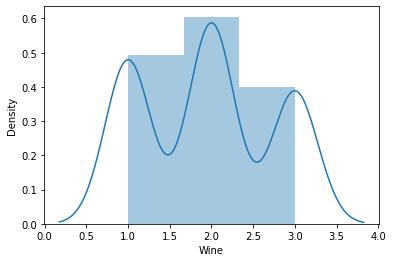

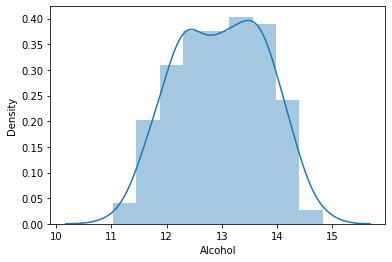

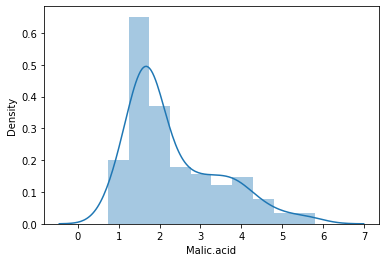

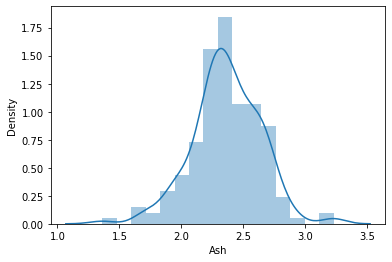

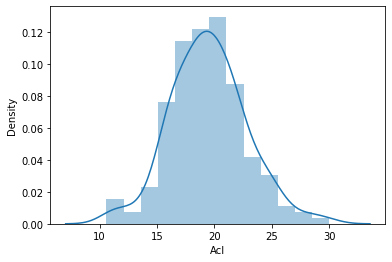

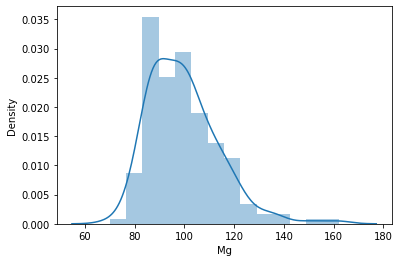

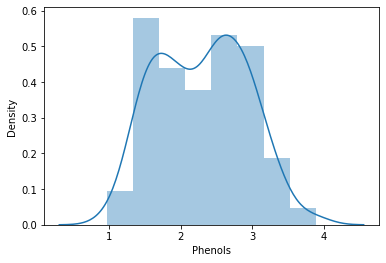

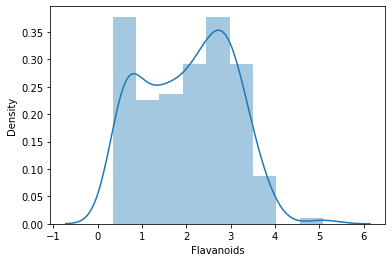

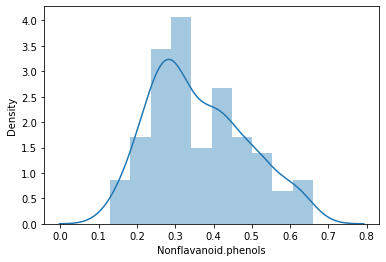

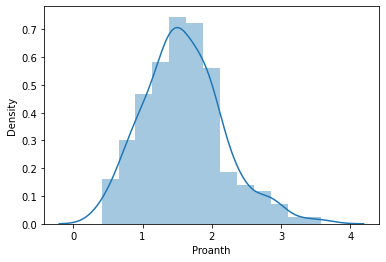

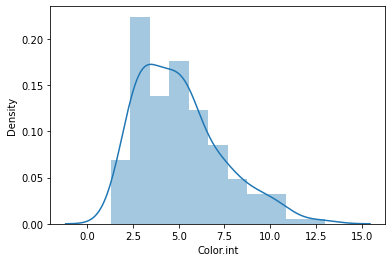

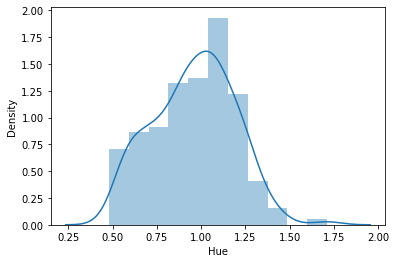

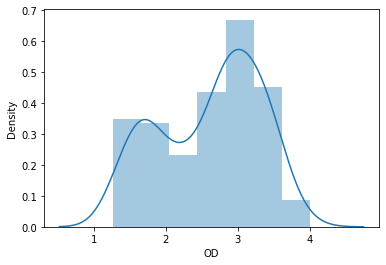

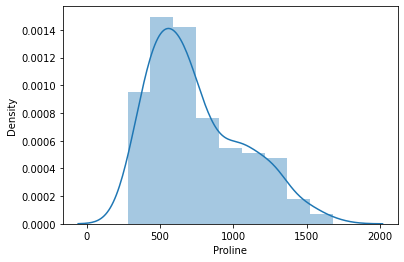

In [ ]:
#dist for numerical attributes
df = df[1:-1]
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.distplot(df[col])

In [ ]:
sns.pairplot(df,hue='Wine')

Output hidden; open in https://colab.research.google.com to view.

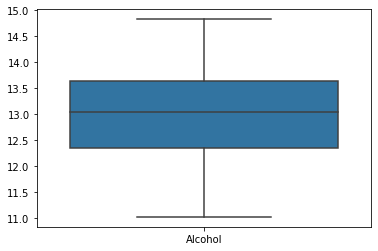

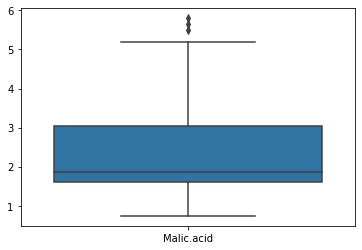

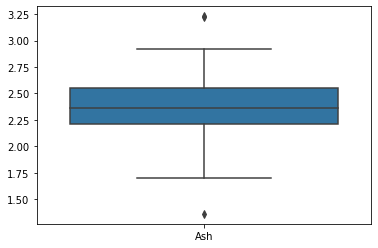

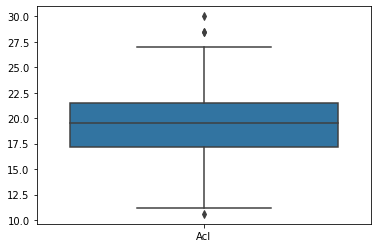

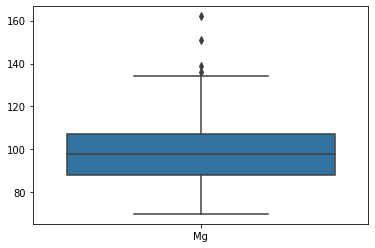

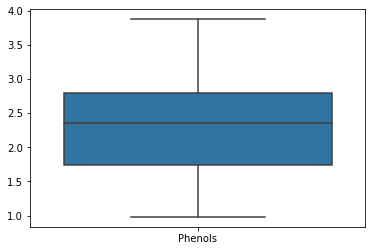

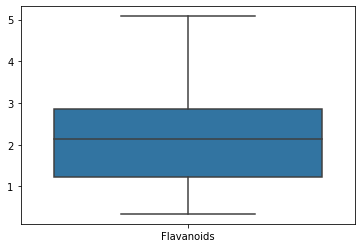

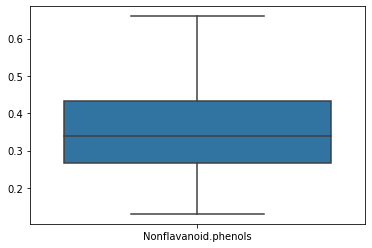

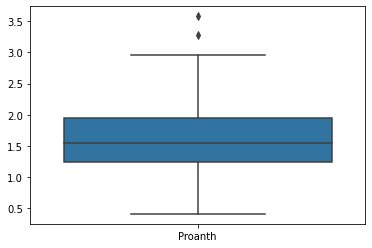

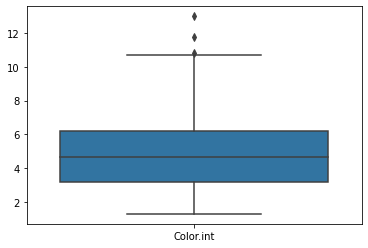

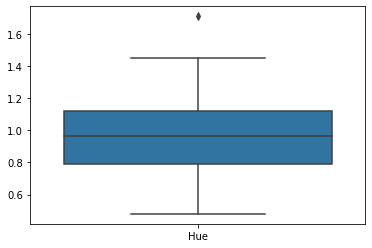

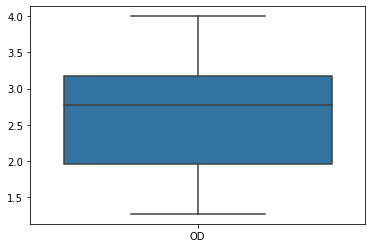

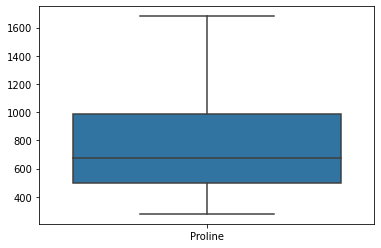

In [ ]:
#box plot 
for column in df.loc[:, 'Alcohol':'Proline']:
  sns.boxplot(data = df[[column]])
  plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

#standardization of numerical columns 
temp_df = df.loc[:, 'Alcohol':'Proline'] 

# define standard scaler
scaler = StandardScaler()

# fit & transform data
scaled_data= scaler.fit(temp_df)
temp_df = scaled_data.transform(temp_df) #transform returns numpy array

In [ ]:
# convert numpy array to pandas dataframe
temp_df = pd.DataFrame(temp_df,columns=['Alcohol', 'Malic.acid',	'Ash',
                                        'Acl', 'Mg',	'Phenols', 'Flavanoids', 
                                        'Nonflavanoid.phenols',	'Proanth',
                                        'Color.int',	'Hue',	'OD', 'Proline'
                                        ])
print(temp_df)

      Alcohol  Malic.acid       Ash  ...       Hue        OD   Proline
0    0.264580   -0.494779 -0.818763  ...  0.399973  1.126955  0.965920
1    0.214843    0.027096  1.118194  ...  0.312111  0.798854  1.395073
2    1.719380   -0.341815  0.496906  ... -0.434719  1.198281  2.332852
3    0.314316    0.234046  1.849121  ...  0.356042  0.456488 -0.035438
4    1.507998   -0.512774  0.314174  ...  0.399973  0.342366  2.237484
..        ...         ...       ...  ...       ...       ...       ...
171  1.458262    0.162063  0.423813  ... -1.489067 -1.283873 -0.273856
172  0.898723    2.987383  0.314174  ... -1.401204 -1.241077 -0.019543
173  0.513263    1.421760  0.423813  ... -1.137617 -1.497851  0.012246
174  0.351619    1.754680 -0.380207  ... -1.620860 -1.497851  0.282454
175  0.227277    0.234046  0.021803  ... -1.576929 -1.412260  0.298348

[176 rows x 13 columns]


In [ ]:
temp_df['Wine'] = df['Wine'].values #creating target variable of temp_df

In [ ]:
temp_df.head(1)

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Wine
0,0.26458,-0.494779,-0.818763,-2.500541,0.027665,0.569092,0.733718,-0.817696,-0.539672,-0.282755,0.399973,1.126955,0.96592,1


In [ ]:
len(temp_df)
print(temp_df.isnull().sum()) #total null values

Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
Wine                    0
dtype: int64


In [ ]:
#remove outlier
def remove_outlier(my_column,df):
  '''
  remove outliers from all columns
  find upper & lower limit for data points 
  delete outliers inplace    
  
  input: single column(pandas series)
         dataframe(pandas dataframe)
  return: None
     
  '''
  #outliers range = column mean + or - (3 * standard deviation of columns)
  upper_limit_outlier = temp_df[my_column].mean() + (3*temp_df[my_column].std())
  lower_limit_outlier = temp_df[my_column].mean() - (3*temp_df[my_column].std())

  temp_df.drop(temp_df[temp_df[my_column] > upper_limit_outlier].index, inplace = True) # upper limit outliers
  temp_df.drop(temp_df[temp_df[my_column] < lower_limit_outlier].index, inplace = True) # lower limit outliers

for col in temp_df.iloc[:,:-1]:
    remove_outlier(col,temp_df)

In [ ]:
len(temp_df)

166

In [ ]:
target = temp_df['Wine'] # target variable
df = temp_df.drop('Wine',axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df,target, 
                                                    test_size = 0.2, 
                                                    random_state = 10,
                                                    stratify= target)

In [ ]:
print(x_train.shape) 
print(x_test.shape)

(132, 13)
(34, 13)


In [ ]:
from sklearn import tree
#decision tree model with entropy 
dtree = tree.DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#prediction and accuracy
y_pred_dtree = dtree.predict(x_test)
accuracy_score(y_test,y_pred_dtree)

0.9411764705882353

[Text(697.5, 951.3000000000001, 'Flavanoids <= 0.271\nentropy = 1.574\nsamples = 132\nvalue = [45, 50, 37]\nclass = 2'),
 Text(279.0, 679.5, 'Color.int <= -0.524\nentropy = 1.0\nsamples = 76\nvalue = [0, 39, 37]\nclass = 2'),
 Text(139.5, 407.70000000000005, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = 2'),
 Text(418.5, 407.70000000000005, 'Hue <= 0.049\nentropy = 0.384\nsamples = 40\nvalue = [0, 3, 37]\nclass = 3'),
 Text(279.0, 135.89999999999998, 'entropy = 0.0\nsamples = 37\nvalue = [0, 0, 37]\nclass = 3'),
 Text(558.0, 135.89999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = 2'),
 Text(1116.0, 679.5, 'Proline <= -0.069\nentropy = 0.715\nsamples = 56\nvalue = [45, 11, 0]\nclass = 1'),
 Text(976.5, 407.70000000000005, 'Mg <= 0.169\nentropy = 0.414\nsamples = 12\nvalue = [1, 11, 0]\nclass = 2'),
 Text(837.0, 135.89999999999998, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11, 0]\nclass = 2'),
 Text(1116.0, 135.89999999999998, 'entropy = 0.0\nsamples = 1\n

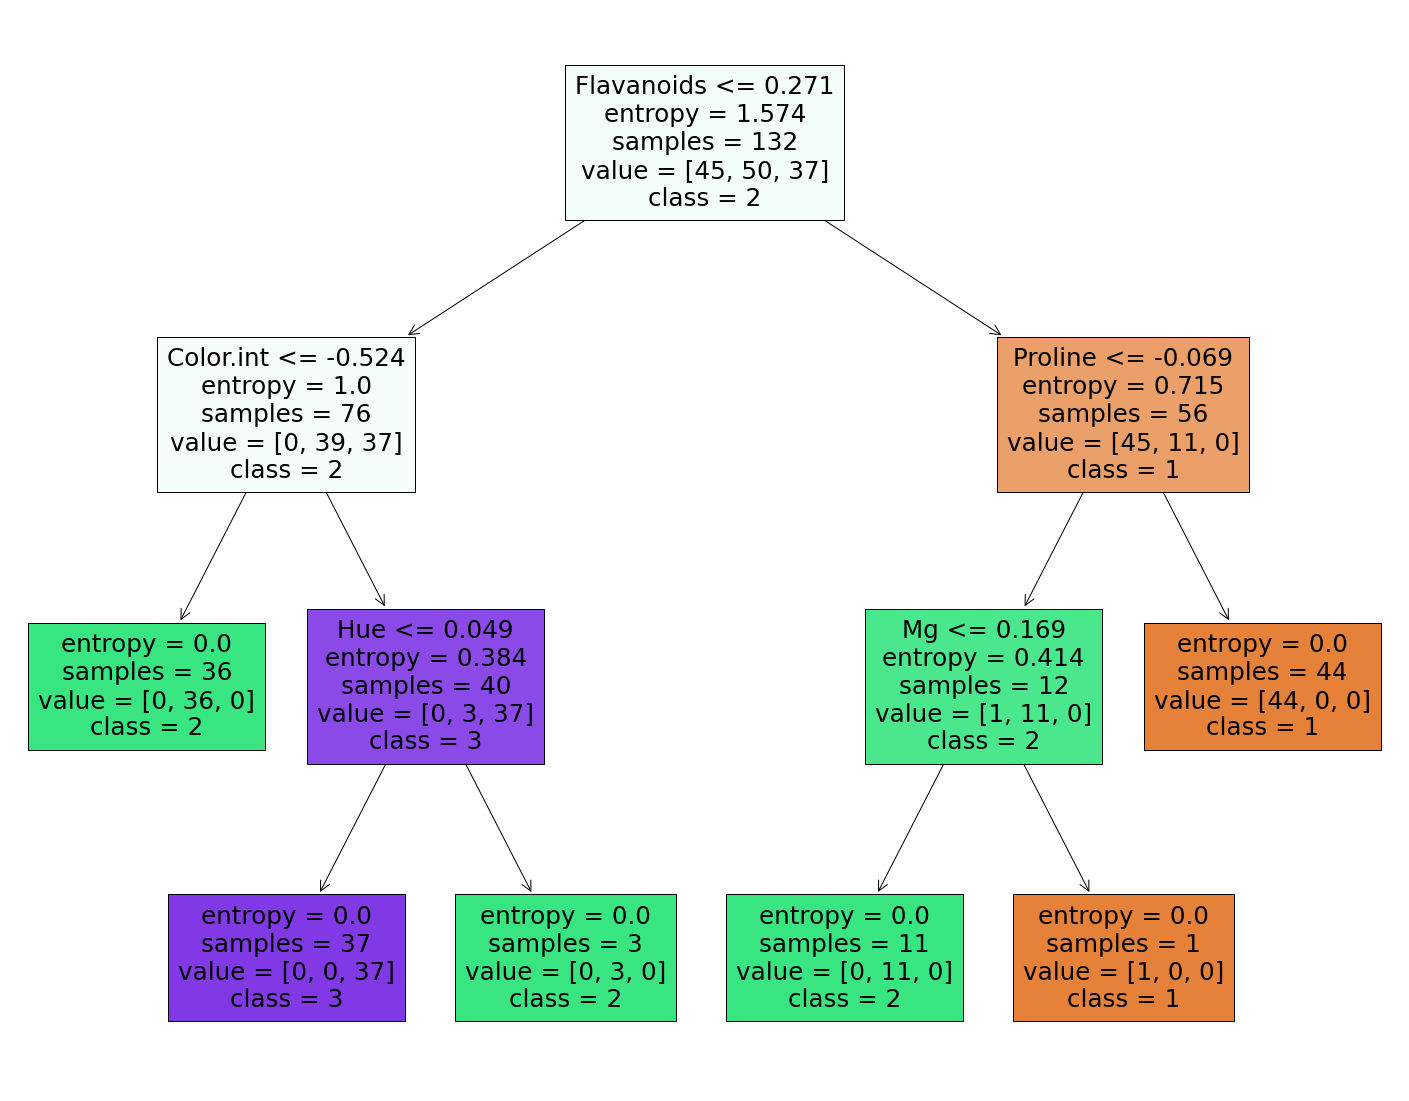

In [ ]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dtree, 
              feature_names=['Alcohol', 'Malic.acid',	'Ash',
                             'Acl', 'Mg',	'Phenols', 'Flavanoids',
                             'Nonflavanoid.phenols',	'Proanth',
                             'Color.int',	'Hue',	'OD', 'Proline'
                             ],  
              class_names=['1','2','3'],
              filled=True)

#pruning

In [ ]:
'''
https://www.youtube.com/watch?v=D0efHEJsfHo
Greater values of ccp_alpha increase the number of nodes pruned
Minimal cost complexity pruning recursively finds the node with the 'weakest link'
impurities: total leaf impurities at each step of the pruning process

1)calculate sum of all squared residual of tree (ssr)
  residuals : the difference between predicted and actual values
2)keep pruning leaves and calculate ssr for each tree unless only 1 leaf remains
3)calculate tree score for each tree by apply tree complexity penalty to each tree
  Tree Score = sum of squared residual + αT
  α (alpha) is a tuning parameter
  T is num of leaves
  (more leaves, larger the penalty)
4)how to find best α : start from 0, keep increasing until pruning leaves gives
  lower tree score  
5)calculate ssr for each new tree using testing data(use k fold cross validation)
6)avg value of α for lowest ssr tree is final α  
'''
path = dtree.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
print(ccp_alphas)

[0.         0.03761971 0.11645804 0.265598   0.45901188 0.69543395]


In [ ]:
#train new tree for each alpha and store it
dtrees = []
for ccp_alpha in ccp_alphas:
    dtree = tree.DecisionTreeClassifier(criterion='entropy',random_state=48, ccp_alpha=ccp_alpha)
    dtree.fit(x_train, y_train)
    dtrees.append(dtree)

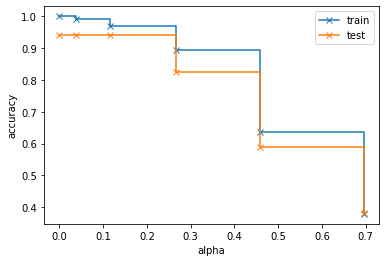

In [ ]:
#plot training score vs testing score for each tree
train_scores = [dtree.score(x_train, y_train) for dtree in dtrees]
test_scores = [dtree.score(x_test, y_test) for dtree in dtrees]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(ccp_alphas, train_scores, marker='x', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='x', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
#using alpha value to train new tree
dtree = tree.DecisionTreeClassifier(criterion='entropy',random_state=48, ccp_alpha=0.11645804)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.11645804, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=48, splitter='best')

In [ ]:
y_pred_dtree = dtree.predict(x_test)
accuracy_score(y_test,y_pred_dtree)

0.9411764705882353

In [ ]:
predicted_probas = dtree.predict_proba(x_test)

[Text(697.5, 951.3000000000001, 'Flavanoids <= 0.271\nentropy = 1.574\nsamples = 132\nvalue = [45, 50, 37]\nclass = 2'),
 Text(348.75, 679.5, 'Color.int <= -0.524\nentropy = 1.0\nsamples = 76\nvalue = [0, 39, 37]\nclass = 2'),
 Text(174.375, 407.70000000000005, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = 2'),
 Text(523.125, 407.70000000000005, 'Ash <= -1.111\nentropy = 0.384\nsamples = 40\nvalue = [0, 3, 37]\nclass = 3'),
 Text(348.75, 135.89999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = 2'),
 Text(697.5, 135.89999999999998, 'entropy = 0.0\nsamples = 37\nvalue = [0, 0, 37]\nclass = 3'),
 Text(1046.25, 679.5, 'Proline <= -0.069\nentropy = 0.715\nsamples = 56\nvalue = [45, 11, 0]\nclass = 1'),
 Text(871.875, 407.70000000000005, 'entropy = 0.414\nsamples = 12\nvalue = [1, 11, 0]\nclass = 2'),
 Text(1220.625, 407.70000000000005, 'entropy = 0.0\nsamples = 44\nvalue = [44, 0, 0]\nclass = 1')]

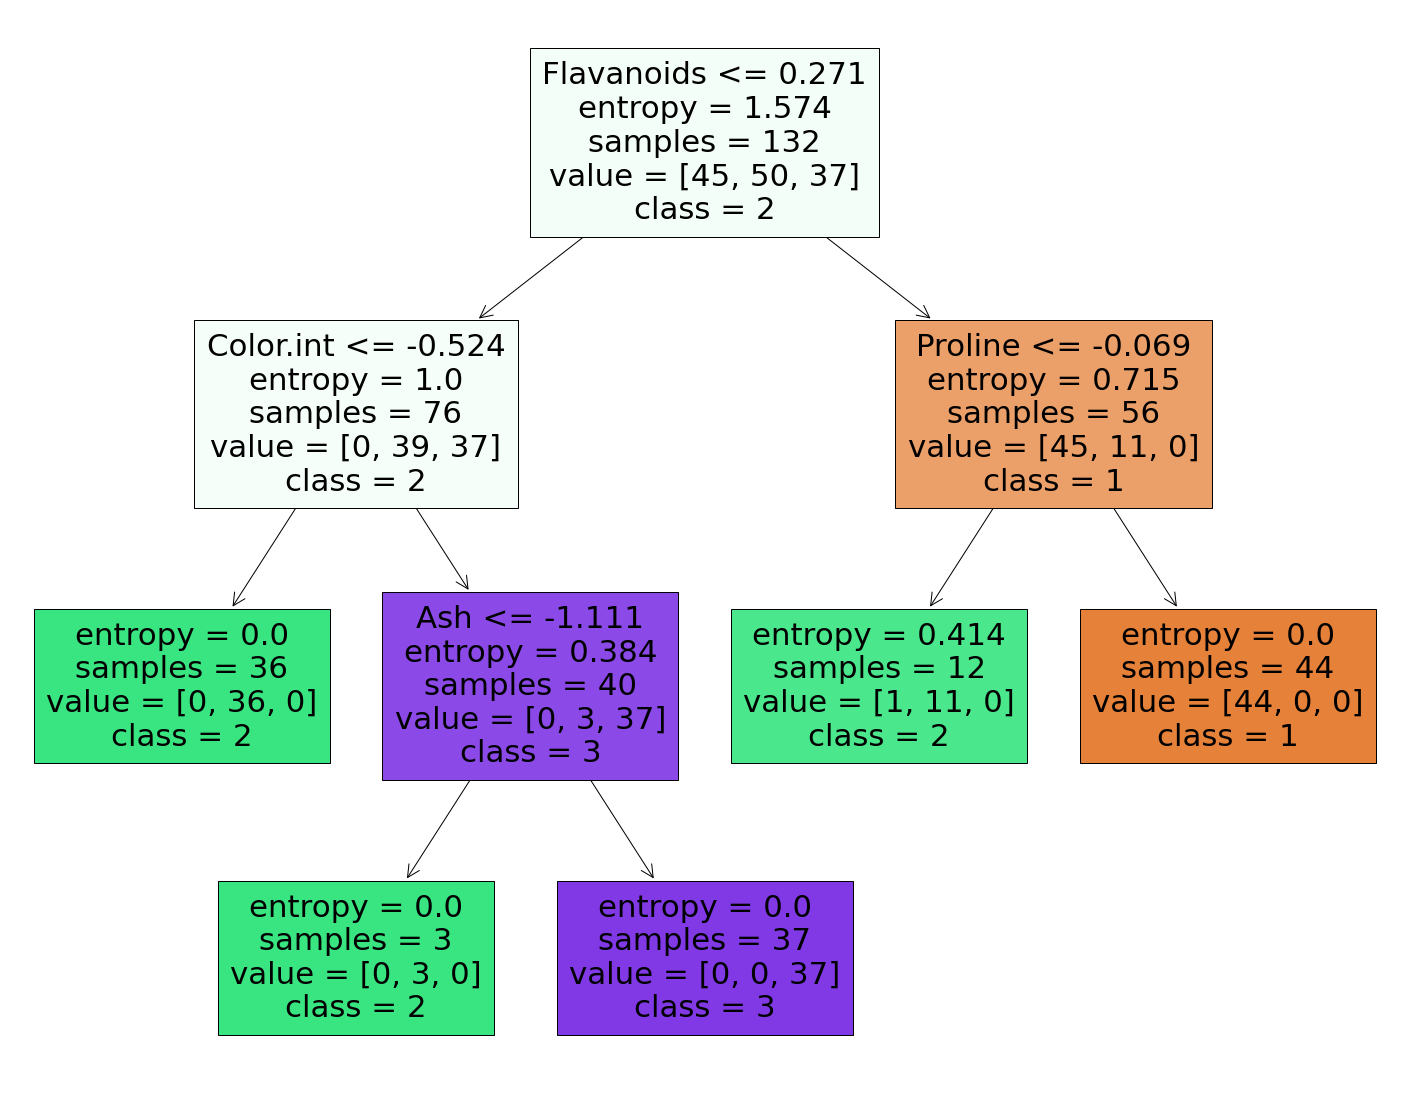

In [ ]:
#plot tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dtree, 
              feature_names=['Alcohol', 'Malic.acid',	'Ash',
                             'Acl', 'Mg',	'Phenols', 'Flavanoids',
                             'Nonflavanoid.phenols',	'Proanth',
                             'Color.int',	'Hue',	'OD', 'Proline'
                             ],  
              class_names=['1','2','3'],
              filled=True)

#finding top features


In [ ]:
#feature selection 
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(dtree, prefit=True)
df_new = model.transform(df)
df_new.shape

(166, 3)

In [ ]:
#Flavanoids, Color.int, Proline are most imp features
print(df_new[0])
df.head(1)

[ 0.7337184  -0.2827551   0.96591964]


,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,0.26458,-0.494779,-0.818763,-2.500541,0.027665,0.569092,0.733718,-0.817696,-0.539672,-0.282755,0.399973,1.126955,0.96592


In [ ]:
# train new d_tree with selected features 
new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(df_new,target, 
                                                    test_size = 0.2, 
                                                    random_state = 10,
                                                    stratify= target)

new_dtree = tree.DecisionTreeClassifier(criterion='entropy')
new_dtree.fit(new_x_train, new_y_train)

new_y_pred_dtree = new_dtree.predict(new_x_test)
accuracy_score(new_y_test,new_y_pred_dtree)

0.9705882352941176

# Random Forest

In [ ]:
#random forest with new features
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=50,verbose=2,n_estimators=10, ccp_alpha= 0.11645804)
rf.fit(new_x_train, new_y_train) #model training

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.11645804, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=50, verbose=2,
                       warm_start=False)

In [ ]:
new_y_pred_rf = rf.predict(new_x_test) #predictions
accuracy_score(new_y_test,new_y_pred_rf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


0.9411764705882353

#bagging boosting
* Bagging(Bootstrap Aggregation): bootstrapped dataset, subset of entire dataset
over bagging in random forest: subset of entire dataset + subset of attibutes  

* Boosting: sequential training of trees, new tree learns from errors of previous tree 
https://towardsdatascience.com/basic-ensemble-learning-random-forest-adaboost-gradient-boosting-step-by-step-explained-95d49d1e2725

how to optimize errors of previous tree? 
gradient boosting or adaboost

Adaboost to change weights in tree
instead of P & N for entropy calculation
weight is assign to each P & N class
weights in decision tree:
1. https://machinelearningmastery.com/cost-sensitive-decision-trees-for-imbalanced-classification/

2. https://stackoverflow.com/questions/36700819/weighing-samples-in-a-decision-tree


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators=10, random_state=37, learning_rate=0.1)
adb.fit(new_x_train, new_y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=10, random_state=37)

In [ ]:
new_y_pred_adb = adb.predict(new_x_test) #predictions
accuracy_score(new_y_test,new_y_pred_adb)

0.9705882352941176

gradient descent for error optimization
Gradient Boosting= Gradient Descent + Boosting
1. https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/

2. https://www.youtube.com/watch?v=jxuNLH5dXCs

for classification <br>
1) calculate initial prediction 
   log(p/n) 

   for prediction use prob of log(p/n) 
   e^log(p/n) / 1 + e^log(p/n)

2) calculate residuals(error) for each value
   and save them in new column
   error = observed - predicted 
   initially observed p = 1 & n = 0
   error for p = 1 - prediction
   error for n = 0 - predcition  

3) tranform errors
   sum(errors of leaves) / 
   sum( previous prob of leaf * (1-previous prob of leaf) )

4)update predictions
  combine initial leaf with new tree 
  new_value = initial leaf output value + (learning rate * current output value of leaf)   

5) convert this new value to prob using (1) prob formula

6) again calculat residuals/errors using new prob 
repeat for n times 

7) final output = avg of prob of all tree

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=4, learning_rate=0.1)
gb.fit(new_x_train, new_y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=4,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
new_y_pred_gb = gb.predict(new_x_test) #predictions
accuracy_score(new_y_test,new_y_pred_gb)

0.9411764705882353

# Logistic Regression


In [ ]:
'''
1/1+e^-(mx+c)
'''
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=94)
lr.fit(new_x_train,new_y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=94, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
new_y_pred_lr = lr.predict(new_x_test)
accuracy_score(new_y_test,new_y_pred_lr)

1.0

# SVM
1. use mid point from the edges of the observatoins/classes as threshold 
2. margin: dist between threshold and nearest observation/classes
3. maximal margin classifier: gives maximum margin from observation/classes
4. face some problems(low bias) with this technique for eg outliers,sensitive to data <br> to avoid this we allow some misclassification (bias/variance tradeoff)
5. new margin is known as soft margin <br> 
and method is known as soft margin classifier/support vector classifier
6. observations on the edge and within softmargin are known as support vectors
find soft margin using cross validation
7. for 1d dividing point is single point
   for 2d its a line
   for 3d its a plane
   for more than 4d its hyperplane
8. when the data overlapps https://www.youtube.com/watch?v=efR1C6CvhmE
   support vector clssifier fails
9. solutions is to transform this data to high dimensions and use support vector clssifier
10. for transformationa use kernel functions
    Gaussian Kernel
    Polynomial kernel 
    adial basis function(rbf)
    Sigmoid kernel
11. use one kernel and try n transformations
    Polynomial kernel (point1 * point2 + r)^d
    r is Kernel coefficient/gamma 
    d is degree of polynomial 
    using cross validation find best kernel transformation   
12. after finding best transformation, transform data and use support vector classifier

In [ ]:
from sklearn import svm
svm_cls = svm.SVC(kernel='poly') # Linear Kernel

svm_cls.fit(new_x_train,new_y_train)

#Predict the response for test dataset
new_y_pred_svm = svm_cls.predict(new_x_test)
accuracy_score(new_y_test,new_y_pred_svm)

0.9411764705882353

In [ ]:
from sklearn import svm
svm_cls = svm.SVC(kernel='linear') # Linear Kernel

svm_cls.fit(new_x_train,new_y_train)

#Predict the response for test dataset
new_y_pred_svm = svm_cls.predict(new_x_test)
accuracy_score(new_y_test,new_y_pred_svm)

1.0